In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry.linestring import LineString
from shapely.geometry.multilinestring import MultiLineString

pct = gpd.read_file("data/Full_PCT.geojson")
pct = pct.to_crs(epsg=4326)

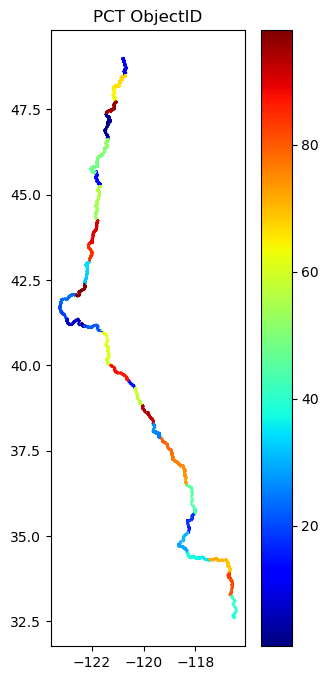

In [2]:
fig, ax = plt.subplots(figsize=(4,8))
pct.plot(ax=ax, column="OBJECTID", cmap="jet", linewidth=2, legend=True)
ax.set_title('PCT ObjectID')
plt.show()

In [3]:
pct.reset_index(inplace=True)

In [4]:
wash = pct[pct["Region"] == "Washington"]

oregon = pct[pct["Region"] == "Oregon"]
northern = pct[pct["Region"] == "Northern California"]
central = pct[pct["Region"] == "Central California"]
socal = pct[pct["Region"] == "Southern California"]

In [5]:
cnt = 0

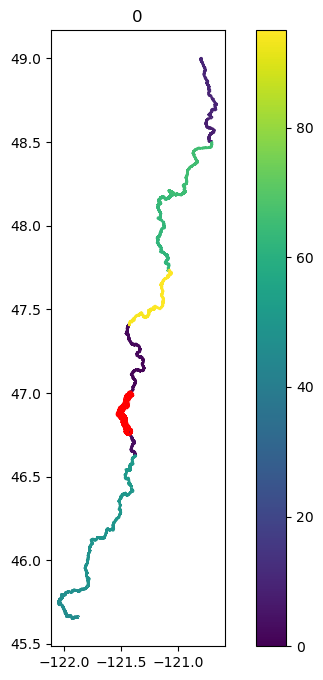

In [6]:
# cycled through this cell for all 5 regions, manually creating arrays in cells below that reorder
fig, ax = plt.subplots(figsize=(8,8))
wash = pct[pct['Region'] == 'Washington']
indices = list(wash["index"])
idx = indices[cnt]
wash.plot(ax=ax, column="index", cmap="viridis", linewidth=2, legend=True)
wash.loc[[idx], "geometry"].plot(ax=ax, color="red", linewidth=5)
ax.set_title(idx)
cnt+=1

<Axes: >

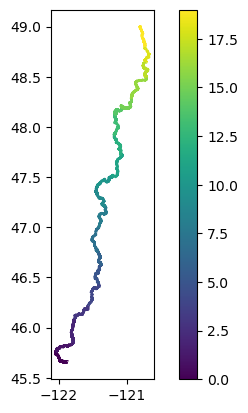

In [7]:
ordering = [ 46, 47, 48, 49, 50, 51,  3, 0, 1, 2, 94, 95, 62, 63, 64, 65, 66, 8, 9, 10]
wash_reordered = wash.loc[ordering].reset_index(drop=True)
wash_reordered = wash_reordered.drop("index", axis=1).reset_index()
wash_reordered.plot(column="index", cmap="viridis", linewidth=2, legend=True)

<Axes: >

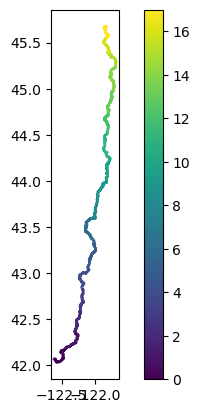

In [8]:
ordering = [96, 97, 31, 32, 33, 83, 84, 85, 88, 89, 90, 52, 53, 54, 55, 11, 12, 13]
oregon_reordered = oregon.loc[ordering].reset_index(drop=True)
oregon_reordered = oregon_reordered.drop("index", axis=1).reset_index()
oregon_reordered.plot(column="index", cmap="viridis", linewidth=2, legend=True)

<Axes: >

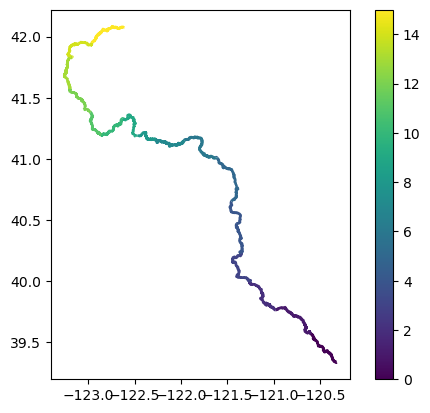

In [9]:
ordering = [14, 86, 87, 59, 60, 61, 20, 21, 4, 5, 6, 7, 18, 19, 22, 23]
northern_reordered = northern.loc[ordering].reset_index(drop=True)
northern_reordered = northern_reordered.drop("index", axis=1).reset_index()
northern_reordered.plot(column="index", cmap="viridis", linewidth=2, legend=True)

<Axes: >

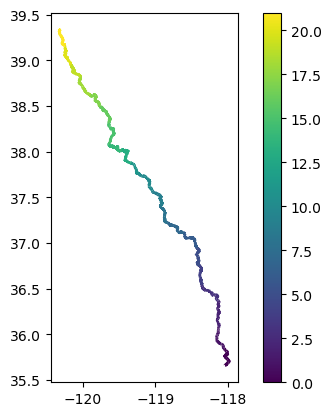

In [10]:
ordering =[42, 43, 44, 45, 72, 73, 74, 75, 76, 77, 78, 79, 27, 24, 25, 26, 91,92,93, 56, 57, 58]
central_reordered = central.loc[ordering].reset_index(drop=True)
central_reordered = central_reordered.drop("index", axis=1).reset_index()
central_reordered.plot(column="index", cmap="viridis", linewidth=2, legend=True)

<Axes: >

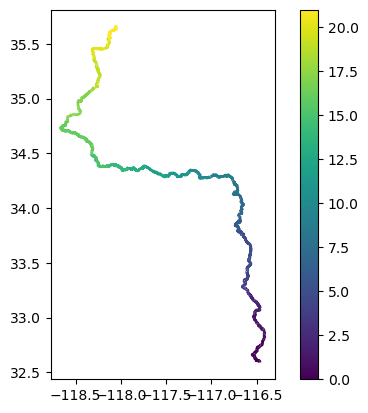

In [11]:
ordering =[38, 39, 40, 41, 80, 81, 82, 67, 68, 69, 70, 71, 34, 35, 36, 37, 28, 29, 30, 15, 16, 17]
socal_reordered = socal.loc[ordering].reset_index(drop=True)
socal_reordered = socal_reordered.drop("index", axis=1).reset_index()
socal_reordered.plot(column="index", cmap="viridis", linewidth=2, legend=True)

In [12]:
# merge all regions back together. Nobo, of course.
import pandas as pd

central_reordered.index = central_reordered.index + len(socal_reordered)
working = pd.concat([socal_reordered, central_reordered])
northern_reordered.index = northern_reordered.index + len(working)
working = pd.concat([working, northern_reordered])

oregon_reordered.index = oregon_reordered.index + len(working)
working = pd.concat([working, oregon_reordered])


wash_reordered.index = wash_reordered.index + len(working)
working = pd.concat([working, wash_reordered])
working.drop("index", axis=1, inplace=True)

<Axes: >

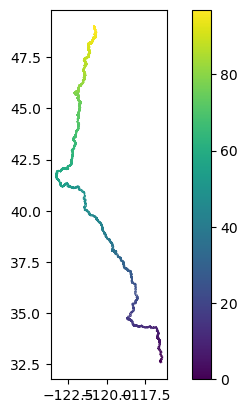

In [13]:
working.reset_index().plot(column="index", legend=True)

In [15]:
working

,OBJECTID,Section_Name,Shape_Length,FolderPath,Region,geometry
0,39,CA Section A,0.563117,Track/1 - Southern California/CA Section A,Southern California,"MULTILINESTRING ((-116.46698 32.58974, -116.46..."
1,40,CA Section A,0.474801,Track/1 - Southern California/CA Section A,Southern California,"MULTILINESTRING ((-116.42126 32.81213, -116.42..."
2,41,CA Section A,0.518929,Track/1 - Southern California/CA Section A,Southern California,"MULTILINESTRING ((-116.52427 33.04549, -116.52..."
3,42,CA Section A,0.124200,Track/1 - Southern California/CA Section A,Southern California,"MULTILINESTRING ((-116.59108 33.21843, -116.59..."
4,81,CA Section B,0.358523,Track/1 - Southern California/CA Section B,Southern California,"MULTILINESTRING ((-116.64496 33.27351, -116.64..."
...,...,...,...,...,...,...
93,66,WA Section K,0.443654,Track/5 - Washington/WA Section K,Washington,"LINESTRING (-121.0492 48.18534, -121.0492 48.1..."
94,67,WA Section K,0.498562,Track/5 - Washington/WA Section K,Washington,"LINESTRING (-120.93169 48.28756, -120.93169 48..."
95,9,WA Section L,0.359541,Track/5 - Washington/WA Section L,Washington,"LINESTRING (-120.70765 48.4985, -120.70766 48...."
96,10,WA Section L,0.404983,Track/5 - Washington/WA Section L,Washington,"LINESTRING (-120.71151 48.6449, -120.7115 48.6..."


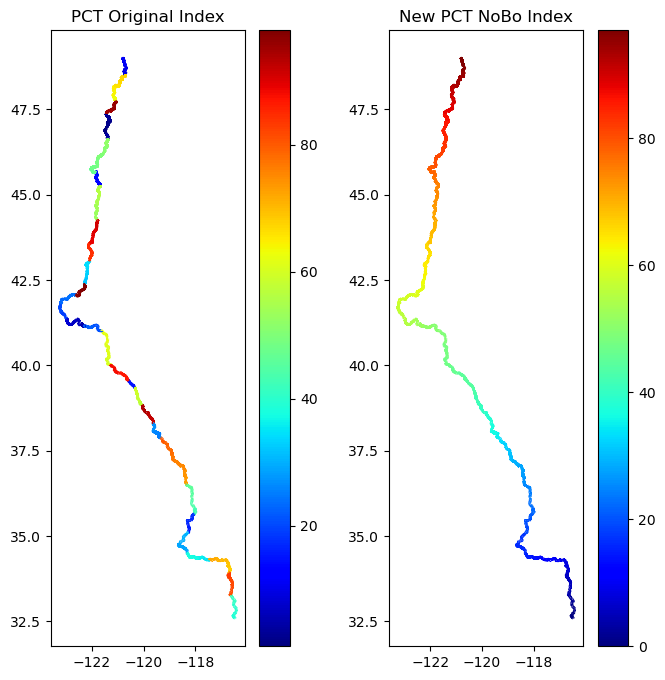

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 8))

pct.plot(ax=ax1, column="OBJECTID", cmap="jet", linewidth=2, legend=True)
ax1.set_title("PCT Original Index")

working.reset_index().plot(column="index", ax=ax2, cmap="jet", linewidth=2, legend=True)
ax2.set_title("New PCT NoBo Index")
plt.show()

In [14]:
working.to_file("data/full_PCT_NoBo.geojson", driver="GeoJSON")

Let's also unwrap it to a single linestring to save as a gpkg

In [24]:
trail = []
for i, row in working.iterrows():
    if type(row.geometry) == LineString:
        trail.append(row.geometry)
    elif type(row.geometry) == MultiLineString:
        for j, geom in enumerate(row.geometry.geoms):
            trail.append(geom)


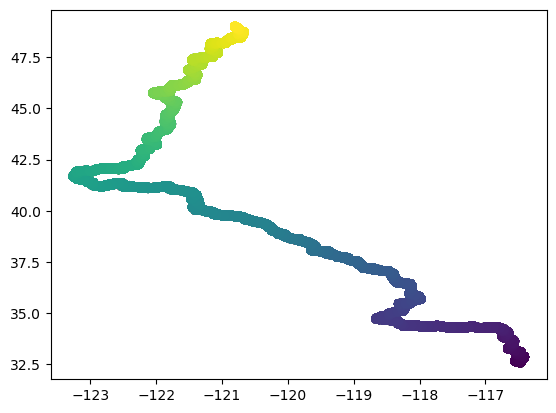

In [32]:
xs = []
for seg in trail:
    xs.extend(np.array(seg.coords))

xs = np.array(xs)

plt.scatter(*xs.T,c=range(len(xs)))

In [36]:
p = gpd.GeoDataFrame(geometry=[LineString(xs)],crs='epsg:4236')

p.to_file('data/full_PCT_NoBo.gpkg', driver='GPKG')